<a href="https://colab.research.google.com/github/prabirdeb/Automated-Question-Answering-System/blob/main/Automated_Question_Answering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Automated Question-Answering**

## <b> Problem Description </b>

### In this project, at first our task is to create a dataset of datascience documents and then extract the topics of the documents and finally build a automated question answering model which will  retrieve the relevant document and generate the answer for the question

# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into quality data for the deep learning model 

## **1. Connection with the Data**

Here, the dataset is the gist of my learning experiences in Almabetter stored in an excel file.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [145]:
# Importing libraries

# Data handling
import numpy as np
import pandas as pd
import re, gensim
import ast

# machine learning
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Text processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
# Importing deep learning libraries

In [147]:
pip install transformers

In [148]:
from transformers import pipeline
ques_ans_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


In [149]:
!pip install pyLDAvis

In [150]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
# Reading the data as pandas dataframe
xls = pd.ExcelFile('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Automated Question Answering System-Prabir Debnath/data.xlsx')
xls.sheet_names

['Concepts']

In [153]:
data_science_df = pd.read_excel(xls, 'Concepts')

## **2. First Feelings of the Data**

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [154]:
data_science_df.head(2)

,Concept-1,Concept-2,Concept-3,Concept-4,Concept-5,Concept-6,Concept-7,Concept-8,Concept-9,Concept-10,...,Concept-12,Concept-13,Concept-14,Concept-15,Concept-16,Concept-17,Concept-18,Concept-19,Concept-20,Unnamed: 20
0,"python tokens, Keywords, Identifiers, Literals...",Python keywords\n\nThere are 32 keywords in C+...,"python data types (Numeric, Boolean, String, D...","Arithmatic Operation\n\n(addition[+], subtract...",floor function\n\nIn mathematics and computer...,ceiling function\n\nThe ceiling function maps ...,Variable\n\nVariable is the storing place in c...,NaN,commenting multiple lines in colab\n\nCtrl + /,Perfect number\n\nPerfect number is a positive...,...,To get the absolute value\n\nabs(5.8-7.8) retu...,The del keyword in python is primarily used to...,order of precedence in python\n\ni) Parenthese...,int(True) gives result 1 and int(False) gives 0,An application or app or software or model is ...,NaN,"Four basic answers of any question\n\nyes, no,...",\nlogical resoning\n\nStatement: Is buying thi...,The pprint module provides a capability to “pr...,NaN
1,"String is a word, a phrase, a sentence, a para...",NaN,NaN,to print a new line\n\nprint('Use \n to print ...,for color print\n\nfrom termcolor import color...,Grabbing the element by index \n\nprint(string...,"String Slicing, \n\n[starting index:ending ind...",NaN,NaN,NaN,...,"String functions\n\nprint(), type(), len()\n\n...","String methods \n\nstring.lower(), string.uppe...",way to embed expressions inside string litera...,my_string = 'Albert Einstein' \n\n'Albert' i...,String duplication occurs when we multiply str...,Taking user's input\n\ninputted_number = int(i...,\n\nA string can be called a safe bridge if it...,NaN,String matching\n\nimport re\n pattern = re.co...,NaN


## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions.

In [155]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Concept-1    88 non-null     object
 1   Concept-2    67 non-null     object
 2   Concept-3    63 non-null     object
 3   Concept-4    74 non-null     object
 4   Concept-5    70 non-null     object
 5   Concept-6    73 non-null     object
 6   Concept-7    62 non-null     object
 7   Concept-8    59 non-null     object
 8   Concept-9    60 non-null     object
 9   Concept-10   64 non-null     object
 10  Concept-11   57 non-null     object
 11  Concept-12   59 non-null     object
 12  Concept-13   59 non-null     object
 13  Concept-14   56 non-null     object
 14  Concept-15   48 non-null     object
 15  Concept-16   39 non-null     object
 16  Concept-17   34 non-null     object
 17  Concept-18   41 non-null     object
 18  Concept-19   34 non-null     object
 19  Concept-20   23 non-null     ob

## **4. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

We check the statistics further on clean data.

Creating Dataset with Relevant Features

In [156]:
relevant_features=['Concept-1', 'Concept-2', 'Concept-3', 'Concept-4', 'Concept-5',
       'Concept-6', 'Concept-7', 'Concept-8', 'Concept-9', 'Concept-10',
       'Concept-11', 'Concept-12', 'Concept-13', 'Concept-14', 'Concept-15',
       'Concept-16', 'Concept-17', 'Concept-18', 'Concept-19', 'Concept-20']

In [157]:
data_science_df_clean=data_science_df[relevant_features]

In [158]:
# Creating documents with all individual cell
data_science_df_clean=pd.DataFrame(data_science_df_clean.values.flatten(), columns=['documents'])
data_science_df_clean.head(2)

,documents
0,"python tokens, Keywords, Identifiers, Literals..."
1,Python keywords\n\nThere are 32 keywords in C+...


In [159]:
# Removing null value rows
data_science_df_clean.dropna(inplace=True) 

In [160]:
data_science_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 0 to 1979
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   documents  1130 non-null   object
dtypes: object(1)
memory usage: 17.7+ KB


In [161]:
data_science_df_clean['documents']

0       python tokens, Keywords, Identifiers, Literals...
1       Python keywords\n\nThere are 32 keywords in C+...
2       python data types (Numeric, Boolean, String, D...
3       Arithmatic Operation\n\n(addition[+], subtract...
4        floor function\n\nIn mathematics and computer...
                              ...                        
1972    Knowledge of data science to understand human ...
1973                                                   \n
1977                                                   \n
1978    Prabir Debnath as drona for tellme model\n\nPr...
1979    Help Lines\n\n> I am the 'tellme' question ans...
Name: documents, Length: 1130, dtype: object

In [162]:
# There are many documents with only newline character. Removing those rows
data_science_df_clean=data_science_df_clean[(data_science_df_clean['documents']!='\n')]
data_science_df_clean=data_science_df_clean[(data_science_df_clean['documents']!='\n\n')]

In [163]:
# Checking no data in any row
data_science_df_clean[(data_science_df_clean['documents']=='No data')]

,documents
480,No data
1300,No data
1320,No data
1420,No data


In [164]:
# Removing all the rows with no data and reseting index 
data_science_df_clean=data_science_df_clean[(data_science_df_clean['documents']!='No data')].reset_index()

In [165]:
data_science_df_clean.drop('index',axis=1, inplace=True)

In [166]:
data_science_df_clean['documents']

0       python tokens, Keywords, Identifiers, Literals...
1       Python keywords\n\nThere are 32 keywords in C+...
2       python data types (Numeric, Boolean, String, D...
3       Arithmatic Operation\n\n(addition[+], subtract...
4        floor function\n\nIn mathematics and computer...
                              ...                        
1065    Basic Rule of CTC based technique\n\nCollapse ...
1066    Trigger word detection\n\ne.g. Alexa, Okay Goo...
1067    Knowledge of data science to understand human ...
1068    Prabir Debnath as drona for tellme model\n\nPr...
1069    Help Lines\n\n> I am the 'tellme' question ans...
Name: documents, Length: 1070, dtype: object

Text Pre-processing

In [167]:
# writing abbreviation processing function
def abbreviation_process(text):
    abbreviation_dict= {'ml':'machine learning','cnn':'convolutional neural network',
                        'rnn':'recurrent neural network','Sequence Models':'recurrent neural network',
                        'pca':'principal component analysis','svm':'support vector machine',
                        'knn':'k-nearest neighbors','ann':'artificial neural network',
                        'nn':'neural network','sgd':'stochastic gradient descent',
                        'gd':'gradient descent','nlp':'natural language processing',
                        'nlu':'natural language understanding','api': 'application programming interface',
                        'gui':'graphical user interface','mlops': 'ml lifecycle',
                        'lda':'latent dirichlet allocation','svd':'singular value decomposition',
                        'cf':'collaborative filtering','cpu':'central processing unit',
                        'anova':'analysis of variance','auc':'area under the curve',
                        'cv':'cross validation','dnn':'deep neural network',
                        'eda':'exploratory data analysis','gbm':'gradient boosting machine',
                        'glm':'generalized linear model','gru':'gated recurrent unit',
                        'hmm':'hidden marcov model','ica':'independent component analysis',
                        'lstm':'long short term memory','mape':'mean absolute percentage error',
                        'mse':'mean squared error','rmse':'root mean squared error',
                        'nldr':'non-linear dimensionality reduction','r2':'r-squared',
                        'rf':'random forest','roc':'receiver operating characteristic',
                        'ai':'artificial intelligence', 'shap': 'shapley additive explanations',
                        'lime': 'local interpretable model-agnostic explanations', 'eli5': 'explain like I am 5',
                        'xai': 'explainable artificial intelligence', 'opp': 'object oriented programming',
                        'idle': 'integrated development and learning environment', 'sql': 'structured query language',
                        'rdbms' : 'relational database management system', 'iqr': 'interquartile range',
                        'iid': 'independent and indentically distributed', 'clt': 'central limit theorem',
                        'ols': 'ordinary least squares', 'vif': 'variance inflation factor',
                        'xgboost': 'extreme gradient boosting', 'gmlos': 'geometric mean length of stay',
                        'los': 'length of stay', 'smote': 'synthetic minority over-sampling technique',
                        'snn': 'standard neural network', 'brnn': 'idirectional recurrent neural network',
                        'nlg': 'natural language generation', 'bfs': 'breadth first search',
                        'dfs': 'depth first search', 'os': 'operating system',
                        'cvcs' : 'central version control system','dvcs': 'distributed version control system',
                        'wsgi': 'web server gateway interface', 'asgi': 'asynchronous server gateway interface',
                        'mle': 'machine learning engineering', 'gpu': 'graphics processing unit',
                        'dag': 'directed acyclic graph', 'rdd': 'resilient distributed dataset'}
                        
    text = text.lower()    # converting to lowercase
    text= text.replace('?','') # removing '?' mark
    text = [re.sub('\s+', ' ', sent) for sent in text] # Removing new line characters
    text = [re.sub("\'", "", sent) for sent in text] # Removing distracting single quotes
    text=''.join(text)

    for k in text.split():   # loop for replacing the abbreviations
      for i in abbreviation_dict.keys():
        if k==i:
          text=text.replace(k,abbreviation_dict.get(i))
  
    return text

<input>:41: DeprecationWarning: invalid escape sequence \s
<input>:41: DeprecationWarning: invalid escape sequence \s
<input>:41: DeprecationWarning: invalid escape sequence \s
<input>:41: DeprecationWarning: invalid escape sequence \s
<input>:41: DeprecationWarning: invalid escape sequence \s
<input>:41: DeprecationWarning: invalid escape sequence \s
<input>:41: DeprecationWarning: invalid escape sequence \s
<ipython-input-167-e88bcff58229>:41: DeprecationWarning: invalid escape sequence \s
  text = [re.sub('\s+', ' ', sent) for sent in text] # Removing new line characters


In [168]:
abbreviation_process("cpu ' \n meaning")

'central processing unit    meaning'

In [169]:
# writing text pre-processing function
def text_process(text):
    text = text.lower()    # converting to lowercase
    text =[char for char in text if char not in string.punctuation] # removing punctuations
    text=''.join(text) 
    text=[word for word in text.split() if word not in stopwords.words('english')]  # removing stopwords
    stemmer = SnowballStemmer("english") 
    text=' '.join(text) 
    text = [stemmer.stem(word) for word in text.split()] # stemming operation
    return ' '.join(text)

In [170]:
text_process('I am Running in the field')

'run field'

In [171]:
# Wrting top words function
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_documents = count_vectorizer.fit_transform(text_data.apply(abbreviation_process).apply(text_process).values) # also performing text  and abbreviation processing
    vectorized_total = np.sum(vectorized_documents, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_documents.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

Let's develop a list of the top words used across the documents, which gives us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

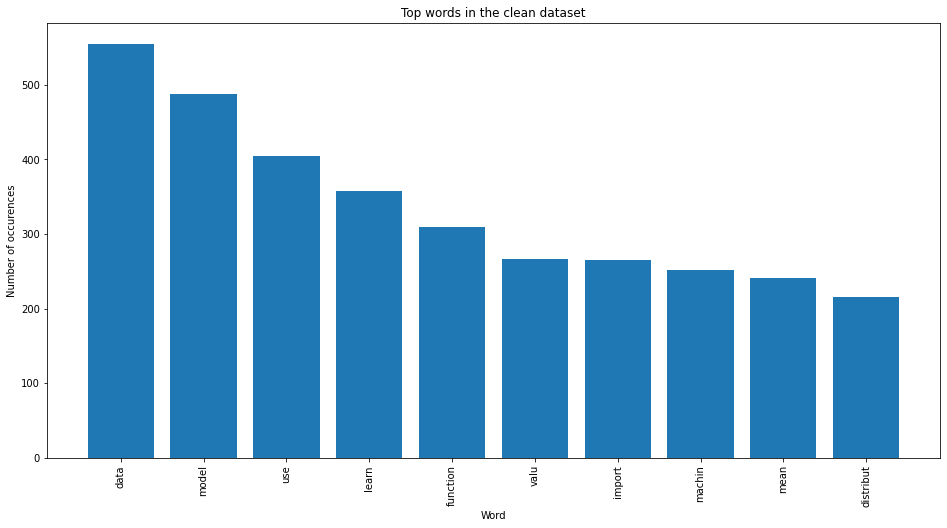

In [172]:
# Ploting top words in the entire dataset
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_science_df_clean['documents'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in the clean dataset')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

## **5. Preparation of Input Data**

In [173]:
# Document processing
data_science_df_clean['documents_processed'] = data_science_df_clean['documents'].apply(abbreviation_process).apply(text_process)
# Considering first 50 letters as the main concept of the document
data_science_df_clean['documents_processed'] = [k[:50] for k in data_science_df_clean.documents_processed] 
# Document tokens
data_science_df_clean['document_tokens']=[k.split() for k in data_science_df_clean.documents_processed]
# Creating new column for first 100 letters
data_science_df_clean['first_100_letters']= [k[:100] for k in data_science_df_clean['documents'].apply(abbreviation_process)] 

In [174]:
data_science_df_clean.to_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Automated Question Answering System-Prabir Debnath/data_science_df_clean.csv')

There are few documents without any content. Therefore final stage cleaning

In [175]:
data_science_df_clean=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Automated Question Answering System-Prabir Debnath/data_science_df_clean.csv')

In [176]:
# Removing null value rows
data_science_df_clean.dropna(inplace=True)

In [177]:
data_science_df_clean=data_science_df_clean.reset_index()

In [178]:
data_science_df_clean.head(2)

,index,Unnamed: 0,documents,documents_processed,document_tokens,first_100_letters
0,0,0,"python tokens, Keywords, Identifiers, Literals...",python token keyword identifi liter punctuat o...,"['python', 'token', 'keyword', 'identifi', 'li...","python tokens, keywords, identifiers, literals..."
1,1,1,Python keywords\n\nThere are 32 keywords in C+...,python keyword 32 keyword c 35 keyword python ...,"['python', 'keyword', '32', 'keyword', 'c', '3...",python keywords there are 32 keywords in c++ ...


In [179]:
data_science_df_clean.drop(['index', 'Unnamed: 0'],axis=1, inplace=True)

In [180]:
data_science_df_clean.head(2)

,documents,documents_processed,document_tokens,first_100_letters
0,"python tokens, Keywords, Identifiers, Literals...",python token keyword identifi liter punctuat o...,"['python', 'token', 'keyword', 'identifi', 'li...","python tokens, keywords, identifiers, literals..."
1,Python keywords\n\nThere are 32 keywords in C+...,python keyword 32 keyword c 35 keyword python ...,"['python', 'keyword', '32', 'keyword', 'c', '3...",python keywords there are 32 keywords in c++ ...


In [181]:
data_science_df_clean.to_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Automated Question Answering System-Prabir Debnath/data_science_df_clean.csv')

# **Building of Topic Model**

In [182]:
# vectorization of documents
count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)

text_sample = data_science_df_clean.documents_processed.values

print('Document before vectorization: {}'.format(text_sample[0]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Document after vectorization: \n{}'.format(document_term_matrix[0]))

Document before vectorization: python token keyword identifi liter punctuat oper 
Document after vectorization: 
  (0, 1527)	1
  (0, 1927)	1
  (0, 994)	1
  (0, 881)	1
  (0, 1066)	1
  (0, 1516)	1
  (0, 1330)	1


Building LDA model with sklearn and hyperparameter tuning

In [183]:
lda = LatentDirichletAllocation()

grid_params={'n_components': list(range(5,10)), 'learning_decay': [.5, .7, .9]}

lda_model = GridSearchCV(lda,param_grid=grid_params)

lda_model.fit(document_term_matrix)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8, 9]})

Let's see the best topic model and its parameters

In [184]:
# Best Model
best_lda_model = lda_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_model.best_params_)

# Perplexity
print("Model Perplexity: ", round(best_lda_model.perplexity(document_term_matrix),2))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Model Perplexity:  1638.48


Let's visualize the LDA model with pyLDAvis

In [185]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  21.473464
0       51.163364 -159.968018       2        1  19.712144
3      -73.144554   21.523815       3        1  19.711771
4      -66.410133 -110.606438       4        1  19.563240
2       54.417324   12.443444       5        1  19.539381, topic_info=           Term       Freq      Total Category  logprob  loglift
1259    network  45.000000  45.000000  Default  30.0000  30.0000
1837   structur  43.000000  43.000000  Default  29.0000  29.0000
1262     neural  39.000000  39.000000  Default  28.0000  28.0000
1538      queri  35.000000  35.000000  Default  27.0000  27.0000
1019    languag  44.000000  44.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
1039      learn   8.797631  62.614354   Topic5  -5.1189  -0.3298
2061       word   5.689851  17.979383   Topic5  -5.5547   0.4822
557   distribut   6.091657  31.344295   Topic5  -5.4865  -0.0054
1975       type   5.938500  31.264435   Topic5  -5.5119  -0.0283
1185    multipl   5.720219  21.792809   Topic5  -5.5494   0.2952

[310 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
64        1  0.764070   action
72        4  0.642172  address
87        2  0.929296  airflow
92        1  0.637043  algebra
92        2  0.318522  algebra
...     ...       ...      ...
2061      5  0.333716     word
2063      1  0.183204     work
2063      5  0.732817     work
2072      5  0.770461   wrangl
2097      2  0.766874     yolo

[452 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 3])

Let's see the dominant topic in each document

In [186]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(document_term_matrix) # Takes word presence embeding as input and gives contextual embedding as output

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data_science_df_clean['documents']))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.030000,0.030000,0.530000,0.030000,0.390000,2
Doc1,0.020000,0.020000,0.020000,0.020000,0.910000,4
Doc2,0.910000,0.020000,0.020000,0.020000,0.020000,0
Doc3,0.030000,0.030000,0.030000,0.030000,0.900000,4
Doc4,0.030000,0.030000,0.900000,0.030000,0.030000,2
Doc5,0.030000,0.030000,0.900000,0.030000,0.030000,2
Doc6,0.910000,0.020000,0.020000,0.020000,0.020000,0
Doc7,0.030000,0.030000,0.870000,0.030000,0.030000,2
Doc8,0.020000,0.020000,0.020000,0.910000,0.020000,3
Doc9,0.030000,0.030000,0.030000,0.890000,0.030000,3


Review topics distribution across documents

In [187]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,1,236
1,2,210
2,3,207
3,4,205
4,0,205


Let's see the Topic’s keywords

In [188]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = count_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,123n,12c,1952,1991,1bo,1creat,1gl2gl3gl,1issu,...,zfxi,zip,zresul,zwtransposexb,α2,βweig,γα,σ1,σ2,σyw0w1x1w2x2w3x3wn
Topic0,1.199982,1.199982,0.200023,0.200005,0.200005,1.199128,0.200005,0.200005,0.200006,1.199975,...,0.200004,0.200005,0.200005,0.200010,0.200006,1.199981,0.200005,0.200005,2.201153,0.200006
Topic1,0.200004,0.200005,0.232481,1.199978,0.200005,0.200005,0.200004,0.200004,0.200006,0.200005,...,0.200004,0.200004,0.200005,1.199960,0.200006,0.200004,0.200005,0.200004,0.200008,0.200006
Topic2,0.200005,0.200004,1.167454,0.200005,0.200005,0.200857,1.199982,1.199982,0.200007,0.200005,...,0.200005,1.199982,1.199979,0.200009,1.199976,0.200005,1.199979,0.200005,0.200009,1.199976
Topic3,0.200005,0.200004,0.200022,0.200006,0.200005,0.200005,0.200005,0.200004,0.200006,0.200007,...,1.199984,0.200005,0.200005,0.200008,0.200006,0.200005,0.200005,1.199981,1.198821,0.200006
Topic4,0.200005,0.200005,0.200020,0.200005,1.199979,0.200005,0.200005,0.200004,1.199975,0.200008,...,0.200004,0.200004,0.200005,0.200012,0.200006,0.200005,0.200005,0.200005,0.200009,0.200006


Get the top 15 keywords each topic

In [189]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,import,random,variabl,python,creat,data,type,code,modul,numpi,regress,use,varianc,test,packag
Topic 1,basic,learn,machin,matrix,subtop,understand,model,vector,distribut,linear,seri,function,time,tree,regress
Topic 2,structur,queri,languag,function,probabl,data,model,machin,use,line,plot,matrix,learn,statement,string
Topic 3,model,basic,tableau,use,detect,classif,cluster,subtop,object,imag,list,data,anomali,predict,bay
Topic 4,network,neural,basic,panda,data,datafram,deep,oper,column,program,subtop,docker,applic,learn,multipl


# **Checking general answering ability of 'question-answering' model**

In [190]:
question='what is the daily task of a data scientist?'
context='the task of human being is to be honest.'
ans = ques_ans_pipeline(question=question, context=context)
print(ans)

{'score': 0.5999396443367004, 'start': 33, 'end': 39, 'answer': 'honest'}


In [191]:
question='what is the daily task of a data scientist'
context='the role of data scientist is to analyse data.'
ans = ques_ans_pipeline(question=question, context=context)
print(ans)

{'score': 0.485635370016098, 'start': 30, 'end': 45, 'answer': 'to analyse data'}


Thus, bad question, context pair gives bad result by 'question-answering' model 

# **Building of Question-Answering Model-1**

CountVec unigram and Question-Answering Model

In [192]:
# Writing a function for question answering
def tellme1(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_abbre_processed =abbreviation_process(question)
  question_processed = text_process(question_abbre_processed)
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed

  # vectorization of text samples
  count_vectorizer_model = CountVectorizer(stop_words='english', max_features=4000) # Downloading pre-trained vectorization model (CountVectorizer)
  document_term_matrix = count_vectorizer_model.fit_transform(data_science_df_clean.documents_processed.values)

  # CountVec question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  
  vec_1=document_term_matrix[-1:]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=document_term_matrix[k:(k+1)]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.25:  # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question_abbre_processed, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(f"{long_answer_dict.get(max(list(long_answer_dict.keys())))}\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
                        
      else:
        answer=print("Sorry ! I have no experience for this question.\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
        
  except:
    answer=print("There is an exception\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
    
  return answer

In [193]:
tellme1("what is the role of a data scientist")

Role of a data scientist

> A dataset is an experience set and a data scientist is able to understand the features (means Dharma) of the dataset and their relation.

> Thus, a data scientist can  decide the bestfit predictive ML model (algorithm) for a particular problem statement.  

> In simple words, a data scientist is like a teacher or guru who is expert in training and testing a model

::BEGINNERS MAY TYPE 'HELP LINES'


# **Building of Question-Answering Model-2**

TFIDF and Question-Answering Model

In [194]:
# Writing a function for question answering
def tellme2(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_abbre_processed =abbreviation_process(question)
  question_processed = text_process(question_abbre_processed)
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed

  # vectorization of text samples
  tfidf_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 10)
  document_tfidf_matrix=tfidf_vectorizer.fit_transform(data_science_df_clean.documents_processed.values)

  # tfidf question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  vec_1=document_tfidf_matrix[-1:]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=document_tfidf_matrix[k:(k+1)]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.25:    # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question_abbre_processed, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(f"{long_answer_dict.get(max(list(long_answer_dict.keys())))}\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
                      
      else:
        answer=print("Sorry ! I have no experience for this question.\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
          
  except:
    answer=print("There is an exception\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
      
  return answer

In [195]:
tellme2("what is the role of a data scientist")

Subtopics of Data Wrangling

> Basics of Data wrangling
> Concatenating pandas DataFrame
> DataFrame merging operation through joins
> Groupby operation on pandas dataframe for data analysis
> Detailed EDA
> Quick EDA
> Pandas profiling in colab notebook
> EDA practice
> Use of ast library
> Use of explode function


::BEGINNERS MAY TYPE 'HELP LINES'


# **Building of Question-Answering Model-3**

LDA and Question-Answering Model

In [196]:
# Writing a function for question answering
def tellme3(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_abbre_processed =abbreviation_process(question)
  question_processed = text_process(question_abbre_processed)
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed

  # vectorization of text samples
  document_lda_matrix=best_lda_model.transform(document_term_matrix)

  # LDA question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  vec_1=document_lda_matrix[-1:]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=document_lda_matrix[k:(k+1)]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.25:  # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question_abbre_processed, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(f"{long_answer_dict.get(max(list(long_answer_dict.keys())))}\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
                        
      else:
        answer=print("Sorry ! I have no experience for this question.\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
            
  except:
    answer=print("There is an exception\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
          
  return answer

In [197]:
tellme3("what is the role of a data scientist")

Excel functions

COUNT(B2:C8) function calculates the number of cells that have numeric entries

The COUNTA(H2:O16) Function is categorized under Excel Statistical functions. It will calculate the number of cells that have numeric or text entries (i.e not blank)

LEN(H2) returns the string lenth of the cell

IF(LEN(H2)>50,1,0) # returns 1 if string length is greater than 50 elase 0
INDEX(A1:B5,2,2) function returns the value at a given location in a range or array (table ) by index (here row index and column index starts from 1)-// This actually returns value in B2

MATCH(41,B2:B5,0) function returns the index after exact matching of the value with the given range (vertical or horizontal)

-MATCH function is similar like VLOOKUP or HLOOKUP but match function returns index and VLOOKUP or HLOOKUP returns value

=A1=B1 returns True or False

ROUND(235.415, -1) returns 240

ROUND(235.415, -2) ruturns 200

ROUND(235.415, 2) returns 235.42

ROUND(235.415, 0) or ROUNDDOWN(235.415, 0) returns 

# **Building of Question-Answering Model-4**

Word2Vec and Question-Answering Model

In [198]:
# Writing a function for question answering
def tellme4(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_abbre_processed =abbreviation_process(question)
  question_processed = text_process(question_abbre_processed).split()  # Tokenizing the question
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean['document_tokens']=[ast.literal_eval(i) for i in data_science_df_clean['document_tokens']] # List is appearing as string, thus need literal evaluation
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = [question_processed, question_processed, question_processed, question_processed]

  # vectorization of text samples
  w2v_model=gensim.models.Word2Vec(workers=4, min_count=1, window=5)
  w2v_model.build_vocab(data_science_df_clean.document_tokens, progress_per=1000)
  w2v_model.train(data_science_df_clean.document_tokens, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)
  
  # Word2Vec question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  
  vec_1=w2v_model[data_science_df_clean.document_tokens[data_science_df_clean.index.max()]]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=w2v_model[data_science_df_clean.document_tokens[k]]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.25:  # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question_abbre_processed, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(f"{long_answer_dict.get(max(list(long_answer_dict.keys())))}\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
                        
      else:
        answer=print("Sorry ! I have no experience for this question.\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
        
  except:
    answer=print("There is an exception\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
    
  return answer

In [199]:
tellme4('what is the role of a data scientist')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarn

Role of a data scientist

> A dataset is an experience set and a data scientist is able to understand the features (means Dharma) of the dataset and their relation.

> Thus, a data scientist can  decide the bestfit predictive ML model (algorithm) for a particular problem statement.  

> In simple words, a data scientist is like a teacher or guru who is expert in training and testing a model

::BEGINNERS MAY TYPE 'HELP LINES'


# **Building of Question-Answering Model-5**

Countvec ngram and Question-Answering Model

In [200]:
# Writing a function for question answering
def tellme(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean

  # Processing the question
  question_abbre_processed =abbreviation_process(question)
  question_processed = text_process(question_abbre_processed)
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed

  # vectorization of text samples
  ngram_model = CountVectorizer(ngram_range=(1,3)) # Downloading pre-trained vectorization model (ngram)
  document_term_matrix = ngram_model.fit_transform(data_science_df_clean.documents_processed.values)

  # CountVec ngram question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  
  vec_1=document_term_matrix[-1:]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=document_term_matrix[k:(k+1)]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.25:  # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question_abbre_processed, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(f"{long_answer_dict.get(max(list(long_answer_dict.keys())))}\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
                        
      else:
        answer=print("Sorry ! I have no experience for this question.\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
        
  except:
    answer=print("There is an exception\n\n::BEGINNERS MAY TYPE 'HELP LINES'")
  
  return answer

In [201]:
tellme("what is the role of a data scientist")

Role of a data scientist

> A dataset is an experience set and a data scientist is able to understand the features (means Dharma) of the dataset and their relation.

> Thus, a data scientist can  decide the bestfit predictive ML model (algorithm) for a particular problem statement.  

> In simple words, a data scientist is like a teacher or guru who is expert in training and testing a model

::BEGINNERS MAY TYPE 'HELP LINES'


# **Conclusion**

Here, countvec unigram question-answering model (Model-1) is giving better answer than tfidf model (Model-2)

Here, countvec unigram question-answering model (Model-1) is also giving better answer than lda model (Model-3). countvec model is also much faster than lda model.

Here, countvec unigram and word2vec are giving same answer in most of the cases. But countvec unigram question-answering model (Model-1) is better than word2vec model (Model-4) with respect to time and maximum answering ability.

Countvec ngram model (Model-5) is our final model for question answering due to its excellent performance. It is better than countvec unigram model (Model-1).

Now we can build our Streamlit Demo Project with Countvec ngram model(Model-5)